<a href="https://colab.research.google.com/github/hsm4680/Overall-projects/blob/master/Word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###Word2vec
 단어를 벡터화하면 단어의 '문맥적 의미'를 보존할 수 있으며, 유사한 단어들끼리는 모이 단어 벡터들의 코사인 유사도 등을 통해 얼마나 단어들이 가까운 의미를 지녔는지 측정할 수 있다. 단어의 관계도 알 수 있는데 유명한 예시인 king - man + woman = queen 처럼, 벡터 계산을 통해 이를 찾아낼 수 있다.



### Word2vec의  2가지 구현 방법
하나는 CBOW(continuous bag of words)이고 다른 하나는 skip-gram이다. skip-gram의 성능이 조금 더 좋으므로 skip-gram을 사용

위의 문장이 있다고 할 때 우리는 특정 '윈도우 사이즈'를 정해서 문장에서 윈도우를 옮겨가며 가운데 있는 것을 타겟 워드, 나머지는 컨텍스트 워드라고 정한다. 

만약에 윈도우 사이즈를 1로 하면 target 단어의 왼쪽, 오른쪽 단어가 context 단어가 된다. 그러면 이를 (context, target) 쌍으로 만들어보면 다음과 같은 결과를 얻을 수 있다.

([the, brown], quick), ([quick fox], brown), ([brown, jumped], fox), …

​

skip-gram 의 목표는 현재 target word가 주어졌을 때 context word가 나올 확률을 최대화하는 것이다.  아래와 같은 objective funtion을 통해 이를 해줄 수 있다.

In [ ]:
# google colab의 드라이브를 불러와 코드에 반영하기 위한 드라이브 마운트 작업
# [보기] > [목차]를 선택하면 아래 코드가 자동 삽입되나 지금은 구글 드라이브와 연동하여 gdrive 사용

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# os 모듈은 Operation System의 약자로, 운영체제에서 제공되는 기능을 파이썬에서 수행할 수 있게 함.
# 파이썬을 이용해 파일을 복사하거나 디렉토리를 생성하고, 특정 디렉토리 내의 파일을 불러오는 등으로 사용됨.

import os
# os.chdir 함수는 R에서 setwd()와 동일한 역할을 하여 현재 디렉토리를 ''로 변경함.
os.chdir('/content/gdrive/My Drive/Colab Notebooks/')
# os.getcwd()는 현재 디렉토리(Current Working Directory)의 경로를 출력함.
current_path = os.getcwd()
# os.path.join()은 현재 디렉토리의 절대경로/catdog을 출력함.
main_dir = os.path.join(current_path, '2021-data-creator-camp-1030-1')
# os.makedirs는 지정된 경로에 맞게 디렉토리를 생성함.
# os.mkdir()는 새로운 하위 폴더 하나만을 생성할 수 있음.
# os.makedirs()는 경로에 지정된 모든 폴더를 생성함.
# exist_ok = True는 해당 경로에 폴더가 실제로 존재하는 경우에는 그냥 넘어가고, 없는 경우에만 생성하게 함.
os.makedirs(main_dir, exist_ok=True)



In [ ]:
# 경고(Warning)는 코드는 작동하나 의도하지 않은 결과일 수 있음을 알릴 때 출력되는 메시지임.
# 복잡한 작업일수록 이러한 경고 메시지가 뜰 가능성이 높지만 깔끔한 결과 제시를 방해하는 요소일 때가 많음.
# 간단한 경고 필터를 설정해 이러한 경우를 어느 정도 방지함.
import warnings 
warnings.simplefilter('ignore')

# matplotlib에서 제공하는 그래프에서 간혹 마이너스(-) 기호가 깨질 때, 이를 표시되게 수정하는 코드
mpl.rcParams['axes.unicode_minus'] = False

## Random Seed 고정
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
random_state = 42
seed_everything(random_state)

# 팀 이름 설정
team_name = '진리관227호'
import warnings
warnings.filterwarnings('ignore')

# numpy, pandas, matplotlib은 파이썬 데이터 분석의 3대장 격으로 각각 np, pd, plt의 명칭으로 임포트함.

# numpy는 데이터 분석을 용이하게 하기 위한 ndarray(np.array) 구조를 지원하여 행렬 연산을 가능하게 함.
import numpy as np # linear algebra
# pandas는 파이썬 데이터 분석에 필수적인 패키지로 시리즈, 데이터프레임, 패널 데이터 형태를 지원함.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# matplotlib는 파이썬의 시각화 기능을 주로 담당하는 패키지로 거의 모든 형태의 플롯 생성이 가능함.
import matplotlib.pyplot as plt
import matplotlib as mpl

# seaborn은 matplotlib과 함께 파이썬의 대표적인 시각화 도구로, 그래프 스타일 설정 면에서 강점이 있음.
# 정교한 그래프 크기 조절이나 범례 값 조정 시에는 matplotlib을 함께 사용해야 함.
import seaborn as sns

# Random 모듈은 random() 함수로 대표되며 난수 생성에 주로 이용됨.
import random

# %matplotlib inline은 브라우저 상에서 바로 결과를 확인할 수 있게 함.
%matplotlib inline

# nltk는 파이썬에서 자연어 처리 및 문서 분석을 담당하는 텍스트마이닝 핵심 패키지임.
# 말뭉치, 토큰 생성, 형태소 분석, 품사 태깅 등의 기능을 제공함.
import nltk
# NLTK 라이브러리 기반 문장 / 단어 구분을 위해 관련 기능을 추가함.
from nltk import word_tokenize, sent_tokenize
# 불용어(stopword)는 큰 의미가 없는 단어 토큰으로, 문장에서 자주 등장하나 분석에 도움이 되지 않는 단어로 미리 정의됨.
nltk.download('stopwords')
# punkt는 텍스트 파일을 문장 단위로 분해하는 Sentence Tokenize에 활용되는 모델로, 약어(Ph.D.의 .)와 마침표(.) 등을 구분함.
nltk.download('punkt')
# 다운로드된 불용어 토큰을 임포트하여 분석에 활용할 수 있게 함.
from nltk.corpus import stopwords

# BeautifulSoup는 웹 페이지에 해당하는 HTML 문서를 탐색해 원하는 부분만 뽑아낼 수 있게 만들어진 라이브러리임.
from bs4 import BeautifulSoup

# 파이썬에서 정규표현식을 사용하기 위해 필요한 모듈(Regular Expression의 약어), 기본 설치됨.
import re


## Model
# 데이터를 훈련 데이터와 평가 데이터로 구분하기 위해 이용함.
from sklearn.model_selection import train_test_split
# 인공신경망, 딥러닝 모델에서는 변수들이 0과 1 사이의 범위로 변환되어 있어야 함.
# MinMaxScaler 메서드는 위와 같은 역할을 수행할 수 있음.
# StandardScaler는 평균과 표준편차에 근거해 데이터를 표준화함.
# (만약 이상치가 강하게 의심되는 경우 중앙값과 IQR에 근거한 RobustScaler를 사용할 수 있음.)
# Categorical 데이터는 데이터가 수치가 아니며, 이는 기계학습 모델이 받아들일 수 없는 형태임.
# LabelEncoder는 Categorical 데이터를 Numerical 데이터로 변환하는 기능을 수행함.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# 로지스틱 회귀분석과 랜덤 포레스트를 사용하기 위한 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 분류 성능을 측정하기 위한 평가 지표를 임포트하는 부분.
# accuracy : 전체 평가 데이터에서 맞게 예측한 데이터의 비율 ((TP + TN) / Total)
# f1 : 정밀도(Precision), 재현율(Recall)이 주로 1로 치우친다는 점을 고려해 한쪽으로 치우치지 않을 때 점수가 올라가는 평가 지표.
# confusion_matrix : 목표 변수의 원래 클래스와 예측한 클래스가 일치하는지를 혼동행렬로 표현할 수 있음.
# roc_auc_score : ROC 곡선 아래 면적에 기반한 점수, TPR이나 FPR을 복합적으로 고려하여 평가함.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

# 위의 모델은 로지스틱 회귀, 랜덤 포레스트 등 기계학습을 위한 임포트임.
# 아래 부분은 Keras와 관련 함수에 기반해 같은 분류 작업을 딥러닝으로 수행하기 위한 임포트임.

import keras
# One-Hot Encoding은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에만 1을 부여하는 형태임.
# Tokenizer는 단어의 빈도 수를 계산하기 위한 목적 등으로 사용되는 정수 인코딩을 지원함.
from keras.preprocessing.text import one_hot, Tokenizer
# 길이가 동일한 문서들은 하나의 행렬로 인식해 병렬 작업이 가능함. 따라서 문장의 길이를 맞추면 작업 속도가 상승함.
# pad_sequences()는 정수 인코딩을 거친 데이터에 대해 가장 길이가 긴 문장을 기준으로 벡터의 차원을 잡고 빈 부분을 0으로 채움.
# 이때, 문서의 앞에 0을 채우므로 뒤에 채우고 싶다면 padding = "post" 인자를 추가해야 함.
from keras.preprocessing.sequence import pad_sequences

# 일반적인 다층 퍼셉트론 신경망, 특히 이미지 분석은 단계적으로 입력층 - 은닉층 - 출력층을 쌓아나감.
# Sequential은 위처럼 model.add()에 기반한 단계적인 층 쌓기에 적합한 방법론임.
from keras.models import Sequential

# Dense : 모든 노드 사이에 연결선이 형성되는 Fully Connected Layer인 Dense 레이어를 사용하게 하는 함수
# Flatten : 2차원 데이터를 Fully Connected Layer에 적용할 수 있도록 1차원으로 바꾸는 함수
# Embedding : 문자 입력에 대한 학습을 담당하는 Layer로, 단어를 의미론적 기하공간에 매핑할 수 있도록 벡터화시키는 역할을 담당함.
# LSTM : 순환 신경망을 구성하는 레이어로, 과거의 출력 데이터를 재귀적으로 참조하는 방식으로 기능함.
# SpatialDropout1D : 공간적인 드롭아웃을 지원하는 함수로, dropout이 잘 먹히지 않는 상황에서 대안으로 사용됨.
# Input : 입력층을 별도로 정의하기 위해 사용하는 함수
# Bidirectional : LSTM의 양방향 수행을 지원하는 함수로, LSTM 내에서 순행과 역행 참조를 모두 가능하게 함.
# Dropout : 어떤 레이어의 모든 노드에서 나가는 Activation을 제거하여 과적합을 방지하는 함수
from keras.layers import Dense, Flatten, Embedding, LSTM, SpatialDropout1D, Input, Bidirectional,Dropout

# EarlyStopping은 학습 진행 도중 손실 함수가 더 이상 줄어들지 않는 조건에서 실행되며 학습을 자동으로 중단함.
# ReduceLROnPlateau는 학습 진행 도중 평가 지표가 더 이상 향상되지 않는 조건에서 실행되며 학습률을 자동으로 조정함.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Keras 기반 딥러닝 모형의 과적합을 막기 위한 L2 규제 (Ridge Regression)를 도입하는 부분.
from keras.regularizers import l2

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 데이터 준비

Word2vec은 label 되지 않은 데이터를 통해서도 훈련할 수 있기 때문에 요번에는 labeled과 unlabeled train data를 모두 사용하자.

In [ ]:
# Pandas에서 제공하는 read_csv는 R과 동일한 역할을 수행함.
# header = 0은 첫번째 행이 변수명임을 의미함. delimiter = "\t" 이므로 구분자는 tab이며, quoting = 3에 따라 큰따옴표는 무시됨.
raw_train_data_labeled = pd.read_csv(main_dir+'/labeledTrainData.tsv', header=0,delimiter="\t", quoting=3)
raw_test_data = pd.read_csv(main_dir+'/testData.tsv', header=0,delimiter="\t", quoting=3)
raw_train_data_unlabeled = pd.read_csv(main_dir+'/unlabeledTrainData.tsv', header=0,delimiter="\t", quoting=3)



In [ ]:
raw_train_data_labeled.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [ ]:
raw_train_data_unlabeled.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


unlabeled 의 경우 sentiment가 없다.

In [ ]:
X = raw_train_data_labeled['review']
y = raw_train_data_labeled['sentiment']


In [ ]:
review_data = X.append(raw_test_data['review'])

In [ ]:
review_data.shape

(50000,)

In [ ]:
ntrain = X.shape[0]
df = raw_train_data_labeled.append(raw_test_data, sort=False)
df = df.drop(['sentiment'], axis=1)
df_review = df['review']

In [ ]:
'''
Here we will do preprocessing
1. Removing punctuations
2. Lowering all words
3. removing non-alphabet things
4. removing stop words
5. Tokenizing the sentence
'''
# string은 자주 사용하는 문자열(알파벳 대소문자, 숫자 등)을 다수 저장하고 있음.
import string

# lines는 위에서 큰따옴표로 묶인 문장들을 각각 리스트의 element로 변환해 저장함.
review_lines = list()
lines = review_data.values.tolist()

# 단어 형태이면서 불용어가 아닌 소문자 토큰만을 남겨 review_lines에 저장하는 부분.
for line in lines:
    
    '''
    breaks line into it's sub parts like each word and comma etc,
    https://pythonspot.com/tokenizing-words-and-sentences-with-nltk/
    '''
    tokens = word_tokenize(line)   
    
     #convert to lower case
    tokens = [w.lower() for w in tokens]
    
    #remove punctuation from each word
    # brief detail: https://pythonadventures.wordpress.com/2017/02/05/remove-punctuations-from-a-text/
    table = str.maketrans('','', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
     
    # remove remaining tokens that are not alphabetic
    words = [w for w in stripped if w.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    
    review_lines.append(words)

NameError: ignored

### Word2vec 모델 트레이닝

인자로 여러가지 선택을 전달해 줄 수 있다. 주요하게 바꿀 수 있는 요소들은 다음과 같다.

​

architecture: skip-gram (slower, better for infrequent words) vs CBOW (fast)

the training algorithm: hierarchical softmax (better for infrequent words) vs negative sampling (better for frequent words, better with low dimensional vectors)

sub-sampling of frequent words: can improve both accuracy and speed for large data sets (useful values are in range 1e-3 to 1e-5)

dimensionality of the word vectors: usually more is better, but not always

context (window) size: for skip-gram usually around 10, for CBOW around 5

#### word2vec 방식을 통한 모델링


In [ ]:
# gensim과 word2vec를 이용해 모델링하는 부분임.

'''
gensim is python library for training word embeddings in given data
for more information visit: 
1. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
2. http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XEoWKVwzbIV
'''
# 문장 내 각 토큰들끼리의 의미를 고려하여 단어를 벡터로 변화시킴.
# 이 결과를 토대로 Embedding Layer에 적용하여 NLP Task를 수행할 수 있음.

# sentences : 학습시킬 문장
# size : 각 단어에 대해 변환될 벡터의 차원
# workers : 실행할 병렬 프로세스 코어 수
# min_count : 단어의 최소 빈도수, 이보다 작은 빈도의 단어는 무시됨.
# window : 문맥 윈도우 수 (양쪽으로 몇 개까지의 단어를 고려해 의미 파악)
embedding_vector_size = 150
# now training embeddings for each word 
model_2 = gensim.models.Word2Vec(sentences = review_lines, size=embedding_vector_size, min_count=1, window=5, workers=4 )

# to get total number of unique words
words = list(model_2.wv.vocab)

print("vocab size:", len(words))

SyntaxError: ignored

#### FastText 를 통한 모델링


In [ ]:
'''
gensim is python library for training word embeddings in given data
for more information visit: 
1. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
2. http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XEoWKVwzbIV
'''
import gensim
from gensim.models import FastText

embedding_vector_size = 150
# now training embeddings for each word 
model_1 = FastText(sentences = review_lines, size=embedding_vector_size, min_count=1, window=5, workers=4 )  # FastText를 import 하고, word2vec 대신 FastText 함수를 넣으면 돌아간다.

# to get total number of unique words
words = list(model_1.wv.vocab)

print("vocab size:", len(words))

vocab size: 134197


Text(0, 0.5, 'frequency')

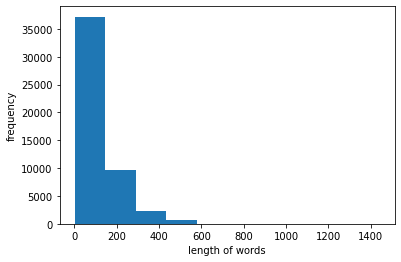

In [ ]:
#len(sequence)
leng=0
length = [(leng + len(x)) for x in review_lines]
plt.hist(length)
plt.xlabel('length of words')
plt.ylabel('frequency')

### 모델 적용


In [ ]:
import math
avg_length = sum(length)/len(review_lines)

# if words are more than max_length then they are skipped, if less than padding with 0 is done
print(avg_length)

122.12676


In [ ]:
#max_len = math.ceil(avg_length)             # this is used to decide how many words in seq to keep
max_len = math.ceil(avg_length) 

In [ ]:
#  Embedding Vector가 만들어졌으면 길이를 맞춰 병렬연산을 수행하는 작업을 거침.

'''
Now we have trained the embeddings, we now have embedding vector for each word. We will
convert our text training data to numeric using theseword embeddings.
First, we need to make length of each input same, therefore we'll do padding. But padding happends 
on numeric data, therefore we'll convert texts to sequences using tokenize() function. Then add padding
Then we'll replace each non-zero numeric resulted from texts to sequences to its corresponding word
embedding.
'''

# 단어를 토큰화하여 가장 빈도가 높은 단어부터 총 6,000개의 단어를 분석에 활용함.
# 이후 이를 벡터 형태로 표현하고, pad_sequences를 통해 길이를 동일하게 함.
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)       #keeps 6000 most common words
train_test_data = review_lines                       # contains word tokens extracted from lines
tokenizer.fit_on_texts(train_test_data)
sequence = tokenizer.texts_to_sequences(train_test_data)
train_test_data = pad_sequences(sequence, maxlen = max_len)

In [ ]:
# Preparing embedding matrix
vocab_size = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((vocab_size, embedding_vector_size))
# +1 is done because i starts from 1 instead of 0, and goes till len(vocab)
for  word, i in tokenizer.word_index.items():
    embedding_vector = model_1.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
X = train_test_data[:ntrain,:]
X = np.append(X,train_test_data[ntrain+25000: ,:])
X = X.reshape(-1,123)
y1 = y

In [ ]:
# 파티셔닝을 통해 훈련 데이터와 평가용 데이터를 구분하는 부분.

X_train, X_test, y_train, y_test = train_test_split(X , y1, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Sequential()을 모델로 선언했으므로 이후 레이어들은 모두 순차적으로 결합됨.
model = Sequential()
# 문자 입력에 대한 학습을 진행하는 레이어로, 데이터를 벡터화하는 과정을 거침.
# input_dim : 단어 사전의 크기, 학습하고자 하는 단어 수와 동일해야 함.
# output_dim : 출력 차원
# input_length : 한 번에 학습하고자 하는 문장의 길이 (Flatten 레이어가 있다면 반드시 그 직전)
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_vector_size, 
                    input_length = max_len, weights = [embedding_matrix]))
# 앞에서부터 단어를 처리하는 순방향 RNN + 뒤에서부터 처리하는 역방향 RNN
# 둘을 결합하면 양방향 RNN (Bidirectional RNN)이 됨.
# 64개의 노드를 갖고, 이중 0.25에 해당하는 노드가 비활성화됨.
# 또한 순환 드롭아웃(Recurrent Dropout)을 통해 순환층의 과대적합을 방지함.
model.add(Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.1)))
# 10개의 전결합층 형성, 드롭아웃은 0.3으로 0.3에 해당하는 노드가 비활성화됨.
model.add(Dense(10))
model.add(Dropout(0.3))
# 최종 출력은 1 또는 0이며 그에 따라 시그모이드 활성화 함수를 취함.
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# 현재 학습률을 조정하기 위해 모니터링하는 대상은 성과 지표임. val_loss로 손실 함수를 볼 수 있음.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            # 지정한 수만큼의 기간에서 성능 향상이 일어나지 않으면 학습률을 조정함.
                                            patience=3, 
                                            # verbose = 1이면 에포크마다 학습 진행사항을 출력하며, 0이면 과정을 출력하지 않음.
                                            verbose=1, 
                                            # 학습률 조정에 사용되는 새로운 값으로, factor * 기존 학습률 = 새 학습률이 됨.
                                            factor=0.5, 
                                            # 학습률의 하한선으로, 이보다 낮은 학습률로 조정되지 않음.
                                            min_lr=0.00001)

### 딥러닝
#### RMSProp 
 기울기를 단순 누적하지 않고 지수 가중 이동 평균 Exponentially weighted moving average 를 사용하여 최신 기울기들이 더 크게 반영되도록 하였다.

 #### Adam
 RMSProp와 Momentum 기법을 합친 optimizer. Momentum에서 관성계수 m과 함께 계산된 V_t 로 parameter를 업데이트하지만 Adam에서는 기울기 값과 기울기의 제곱값의 지수이동평균을 활용하여 step변화량을 조절한다.

 두 방법간 비교해본 결과, 큰 차이는 나타나지 않았음. 비교적 Adam이 로스가 적은듯?


In [ ]:
# 여기서는 학습 이전에 학습과 관련된 설정을 수행하며, 특히 손실 함수와 최적화 방법을 정의함.

# 문제의 유형, 출력층의 활성화 함수, 손실 함수는 서로 연계되어 있음.
# 본 데이터는 Cat과 Dog을 분류하는 Binary Classification Problem Type임.
# 그에 따라 출력층의 활성화 함수는 Sigmoid, 손실 함수는 binary_crossentropy를 사용함.

# 옵티마이저는 케라스 모델의 컴파일에 필요한 또다른 요소이며, 여러 종류가 있음.
# 대부분의 CNN 기반 이미지 분류 문제에서 rmsprop을 사용하는데 이유는 당장 알 수 없음.

# 메트릭은 평가 기준을 말하며, 일반적인 평가 기준으로 accuracy를 사용함.
# 손실 함수와 함꼐 훈련 과정 모니터링에 사용되는 두 지표임.
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

# 이미지가 아닌 일반적인 텍스트 데이터로 제네레이터를 따로 사용하지 않았음.
# X_train, Y_train : 훈련 데이터셋을 제공함.
# Epoch : 전체 데이터셋에 대한 학습 반복 횟수를 지정함.
# batch_size : n개의 예측값마다 실제값과 비교하여 가중치를 수정함.
# validation_data : 검증용 데이터셋을 제공함.
# callbacks : 손실 함수가 감소하지 않거나, 학습률이 더 증가하지 않을 경우를 대비한 Callback Function을 선언함.
history = model.fit(X_train, y_train, epochs = 15, batch_size = 700, validation_data=(X_test, y_test),callbacks = [learning_rate_reduction])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 123, 150)          20129700  
                                                                 
 bidirectional (Bidirectiona  (None, 128)              110080    
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 20,241,081
Trainable params: 20,241,081
Non-trainable params: 0
____________________________________________

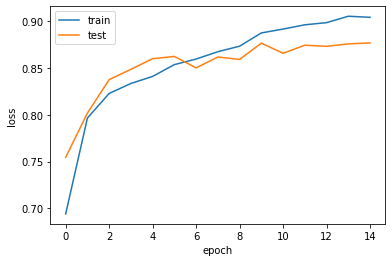

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 평가용 데이터와 모델에 기반한 예측을 수행함.
y_test_pred = model.predict(X_test)

In [ ]:
# roc_auc_score : ROC 곡선 아래 면적에 기반한 점수, TPR이나 FPR을 복합적으로 고려하여 평가함.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred, average = 'weighted')

0.9462876175727911

In [ ]:
#predicting test_data
y_pred = model.predict(train_test_data[ntrain:ntrain+25000 , :])

In [ ]:
# 0.5 cutoff를 사용함. 하이퍼파라미터이므로 바뀔 수 있음.
predictions = [1 if (x>0.5) else 0 for x in y_pred ]

In [ ]:
predictions = pd.Series(predictions)

In [ ]:
ids = raw_test_data['id'].str.replace('"', '')

In [ ]:
submission = pd.DataFrame({'id': ids, 'sentiment':predictions})
submission.to_csv('word2vec_model2.csv',index=False)